# El perceptrón

## Definición
En machine learning, el perceptrón es un algoritmo de aprendizaje automático supervisado para implementar un modelo de clasificador binario. Qué quiere decir todo esto?

1) Es un algoritmo. Quiere decir que hay varias formas de implemenentar la misma lógica y que se puede implementar en cualquier leguaje de programación (que sea Turing Completo).
2) Que sea de `aprendizaje automático supervisado` quiere decir que para entrenar el modelo, vamos a necesitar un conjunto de datos de entrenamiento que contega pares (entrada, salida). Si por ejemplo, estamos implementado un clasificador para detectar si una imagen contiene un gatito o no, necesitaremos pares de la forma:

| Entrada           | Salida   |
|-------------------|----------|
| Imagen con gatito | true     |
| Imagen con gatito | true     |
| Imagen sin gatito | false    |
| Imagen con gatito | true     |
| ...               | ...      |

Cuando hagamos referencia al conjunto de entradas hablaremos de entradas, features, input, verctor de características, variable independiente, otros nombres; mientras que cuando hablemos del conjunto de las salidas, hablaremos de salidas, output, etiquetas, labels, target, objetivos, variable dependiente, otros nombres.

3) Decimos que el algoritmo implementa el modelo de un clasificador binario por que una vez entrenado, el modelo es capas de hacer una predicción acerca de la si la entrada pertenece o no a una clase particular. Siguiendo con el ejemplo de los gatitos, dada una imagen cualquiera, el modelo predice si hay un gatito en la imagen o no.

## Las partes del perceptrón
El perceptrón (moderno) cuenta con varias partes.
1) **Inputs**: Las entradas del perceptrón. Normalmente denominadas $X = x_0, x_1, x_1, ..., x_n$, es un vector de números.
2) **Weights**: Los pesos del perceptrón. También llamados parámetros del modelo, estos pesos son los que se aprenden durante el proceso de entrenamiento y los que determinan la salida del modelo. Normalmente se lo denomina $W = W_0, W_1, W_2, ..., W_n$. 
3) **Agregation**: Una función de agregación. En general es una suma. Por eso se dice que el perceptrón implementa una suma ponderada, por que es la suma de las entradas ($X$) multiplicada por los pesos ($W$).
4) **Non-linearity**: Una función no lineal de activación. Es una función que determina si el perceptrón se activa o no dada una entrada. Por este motivo se la conoce como `función de activación`. Esta función es no lineal (al contrario de la suma ponderada) y generalmente es una de las siguientes: https://ml-explained.com/blog/activation-functions-explained
5) **Output**: La salida del perceptrón. Normalmente denominada $\hat{y}$ (se pronuncia "y sombrero" o "y hat"), es un valor numérico que luego será interpretado en el contexto del modelo. Volviendo al ejemplo de los gatitos, si la salida es 0 se puede interpretar como que NO hay gatos en la imagen y 1 como lo que SI hay gatos en la imagen.

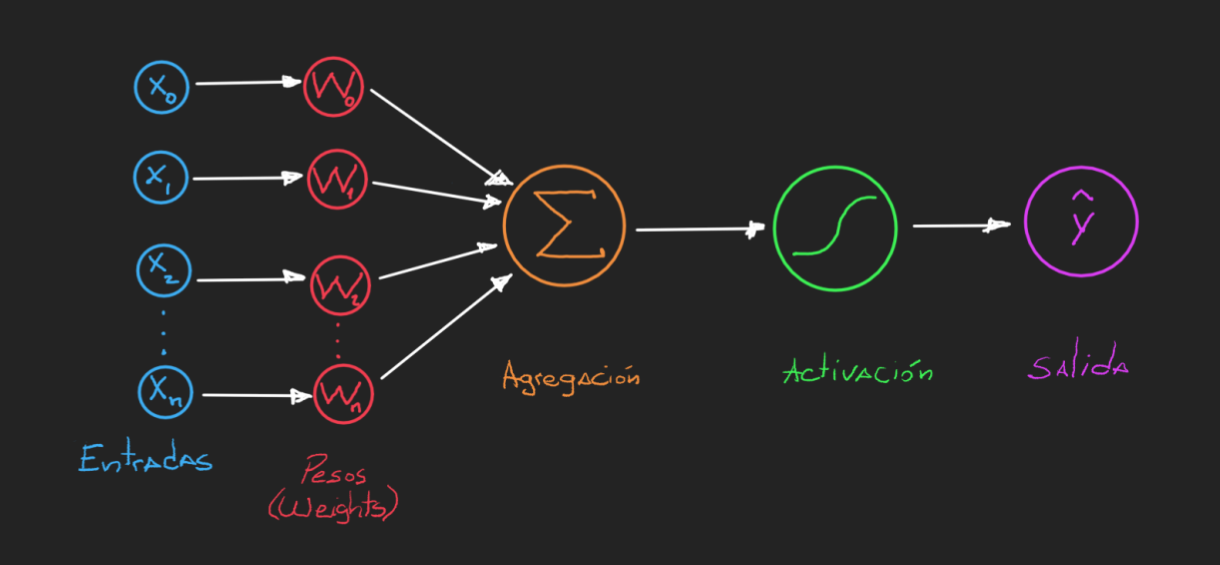

## Cómo se entrena un perceptrón?
Para entender cómo se entrena un perceptrón nos conviene ver a éste como una fórmula matemática, donde la salida $\hat{y}$ es el resultado de aplicar alguna función a las entradas $X$. Si llamamos a esta función $f$, entonces, $\hat{y}$ no es otra cosa que $$\hat{y} = f(X)$$ Esta salida ($\hat{y}$) es en realidad la predicción del modelo. Si el perceptrón está sin entrenar, la salida del modelo es cualquier cosa. Pero cuando el perceptrón está entrenado, dada una entrada $X$, el modelo va a realizar una predicción $\hat{y}$ para esa entrada. En la figura siguiente hay dos ejemplos de perceptrones, una con una función de activación ReLU y otra con una función de activación igual a la tangente hiperbólica ($tanh$).

Resulta que la función $f$ no es cualquier cosa. Para que podamos entrenar la función, tiene que haber algunos componentes que podamos cambiar. Las entradas $X$ vienen dadas, no podemos cambiarlas. Tampoco podemos cambiar el orden en el cual las operaciones que realizan, en un perceptrón todas las operaciones que se realizan son fijas y se ejecutan en un orden determinado. Pero una parte de la función son los pesos $W$. Que el perceptrón esté sin entrenar, no significa otra cosa que que el valor de estos pesos es aleatorio, que es la forma de inicializar el perceptrón al momento de su creación. Es el valor de estos pesos $W$ lo que podemos cambiar a voluntad para que, a medida que entrenemos el perceptrón, la predicción $\hat{y}$ sea la mejor posible.

Entrenar un perceptrón, o cualquier tipo de red neuronal basada en esta tecnología, no es otra cosa que encontrar los pesos correspondientes en la función que haga que la predicción sea buena para algunas de las entradas. Ahora, cómo se hace esto? Cómo medimos que tan buena es la predicción? 

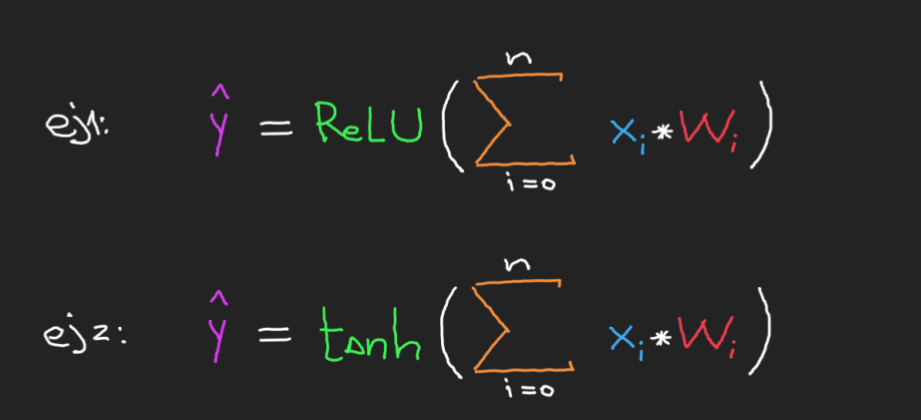

Supongamos que queremos entrenar una función $f$ que tiene como entrada un único $X = [x_0]$ para que nos devuelva el doble de la entrada, es decir $2*x_0$. Definamos entonces nuestro $f$ de la siguiente manera. $$\hat{y} = f(X) = x_0 * W_0$$
Está claro que $W_0$ tiene que ser $2$, pero dijimos que al principio, todos los $W$ se inicializar aleatoriamente. Es decir que si ejecutamos la función, no sabemos cuanto va a dar como resultado para $\hat{y}$ pero sabemos que queremos que de $2*x_0$. Escribamos esto en python.

In [ ]:
# primero unos imports
import matplotlib.pyplot as plt
import numpy as np

El resultado no está ni cerca de el valor esperado para nuestra función $f$ que para $x0 = 5$ debería ser $10$. Esto que hicimos se conoce como *Forward Pass*. Enviamos la entrada a la función, la ejectuamos y vemos cual es el resultado. Lo que intuitivamente deberíamos hacer ahora es modificar el $W$ para que la próxima vez que ejecutemos la función $f$, el resultado se acerque más al valor esperado. Para esto, debemos calcular cuan lejos está el resultado del modelo $\hat{y}$ (la predicción) del verdadero valor (esperado) para la función $f$ al cual llamaremos $y$. La forma de calcular la distancia entre $\hat{y}$ e $y$ depende del problema y puede ser todo lo complicada que uno quiera. Se imaginan como escribirían una expresión matemática para indicar que hay un gato en una foto? Pero está claro que es otra función que dependen ahora de los valores esperados ($y$) y los valores predichos $\hat{y}$, y que estos valores además dependen de las entradas X. Esta nueva función se llama *función de pérdida* o *loss function* y en las fórmulas la vamos a llamar $L$.  

Pero para muchos muchos problemas, alcanza con que $L$ sea la diferencia (la resta) entre el valor esperado y el valor predicho. Eso de alguna manera nos dará información de la distancia a la que estamos del valor esperado dada una predicción. Existen varios problemas con este enfoque. El primero es que la resta tiene signo (puede dar valores negativos). Ya veremos por que esto es un problema. Lo segundo es que idealmente queremos que el valor de $L$ represente de alguna manera que tan lejos estamos del objetivo, no solo cuando $x0 = 5$ sino para todos los valores de $X$ (o al menos para unos cuantos). Esto bien lo podemos hacer con la resta pero vamos a tener diferentes valores para cada valor de $x0$. Es decir, si $x0 = 5$ y $\hat{y} = 1.87$, entonces $y - \hat{y} = 8.13$, pero vamos a tener valores diferentes para otros $x0$.

Para eliminar estos problemas, en lugar de la resta, utilizamos el error cuadrático medio. De esa manera, podemos representar que tan lejos estamos del objetivo usando una función que retorna un único valor positivo para la distancia entre un grupo de entradas y un grupo de salidas.

Intuitivamente, podemos ver que $L$ valdrá 0 solamente cuando los valores predichos $\hat{y}$ sean iguales a $y$. Resulta que "entrenar" a nuestra función $f$ para que aprenda algo, es matemáticamente equivalente a ajustar los pesos $W$ de manera tal de minimizar la función de perdida $L$. Si recuerdan sus clases de cálculo, esto puede hacerse utilizando la derivada de $L$ para encontrar el mínimo, pero de eso nos encargaremos en el siguiente módulo, cuando implementemos Michigrad, nuestro motor de calculo de gradientes.

Por ahora procedamos de manera intuitiva. Qué pasa si sumamos un pequeño valor a $W_0$ repetidamente? estaremos más cerca o más lejos del objetivo?

El problema es, cómo sé si tengo que sumarle o restarle a $W_0$. Esto se logra calculando la derivada de $W_0$ respecto de $L$ para medir como un cambio en $W_0$ afecta a $L$. De esto en general se engarga una pieza de software conocida como motor de cálculo de gradientes automático o Autograd y el algoritmo general para realizar estos calculos se conoce como **Backpropagation**. Luego veremos por que este nombre tiene todo el sentido del mundo. En el módulo 1 vamos a implementar nuestro propio motor de cálculo de gradientes llamado *Michigrad*, pero por ahora vamos a limitarnos a usarlo. *Michigrad* calculará por nosotros el grafo de de operaciones de L necesario para calcular el gradiente de $W_0$ respecto de $L$. Luego y vamos a entrenar $f$ como si fuera un perceptrón.

## Resumen

Entrenar un perceptrón, no es muy diferente de entrenar nuestra función $f$. Los pasos serán siempre los mismo, ya sea usando *Michigrad* o *PyTorch*.

1. Hacer la forward pass. Calcular el valor de nuestra predicción $\hat{y}$ ejecutando el modelo.
2. Calcular la funcion de perdida $L$ en base a los valores conocidos de $y$ (por eso es supervisado). 
3. Poner los gradientes del grafo de dependencias en cero.
4. Ejecutar el algoritmo de backpropagation sobre el grafo de operaciones de $L$ para obtener los gradientes de $W$ respecto de $L$.
5. Actualizar los pesos de los $W$ en la dirección contraria al gradiente.